In [16]:
df = spark.read.load("../data/sample/titanic/train.csv", format="csv", inferSchema="true", header="true")
df.printSchema()
df.show()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|   

In [20]:
df.createOrReplaceTempView("passenger")
query = '''
SELECT
Pclass,
sum(Survived) as live,
count(1) as all,
sum(Survived) / count(1) as ratio
FROM passenger
group by 1
order by 1
'''
sqlDF = spark.sql(query)
sqlDF.show()
sqlDF.write.mode("overwrite").csv("data/output/titanic_result.csv")

+------+----+---+-------------------+
|Pclass|live|all|              ratio|
+------+----+---+-------------------+
|     1| 136|216| 0.6296296296296297|
|     2|  87|184|0.47282608695652173|
|     3| 119|491|0.24236252545824846|
+------+----+---+-------------------+



In [32]:
irisdf = spark.read.load("../data/sample/iris/iris.csv", format="csv", inferSchema="true", header="true")
irisdf.printSchema()
irisdf.show()

root
 |-- SepalLength: double (nullable = true)
 |-- SepalWidth: double (nullable = true)
 |-- PetalLength: double (nullable = true)
 |-- PetalWidth: double (nullable = true)
 |-- Name: string (nullable = true)

+-----------+----------+-----------+----------+-----------+
|SepalLength|SepalWidth|PetalLength|PetalWidth|       Name|
+-----------+----------+-----------+----------+-----------+
|        5.1|       3.5|        1.4|       0.2|Iris-setosa|
|        4.9|       3.0|        1.4|       0.2|Iris-setosa|
|        4.7|       3.2|        1.3|       0.2|Iris-setosa|
|        4.6|       3.1|        1.5|       0.2|Iris-setosa|
|        5.0|       3.6|        1.4|       0.2|Iris-setosa|
|        5.4|       3.9|        1.7|       0.4|Iris-setosa|
|        4.6|       3.4|        1.4|       0.3|Iris-setosa|
|        5.0|       3.4|        1.5|       0.2|Iris-setosa|
|        4.4|       2.9|        1.4|       0.2|Iris-setosa|
|        4.9|       3.1|        1.5|       0.1|Iris-setosa|
|       

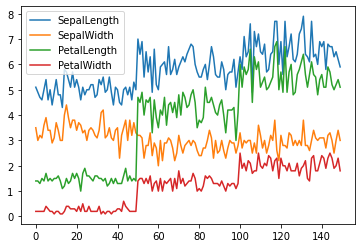

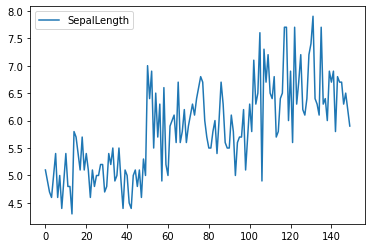

In [33]:
# ref: https://note.nkmk.me/python-pandas-plot/
import matplotlib
irispd = irisdf.toPandas()
irispd.plot()
irispd.plot(y='SepalLength')